In [1]:
from keras.applications import VGG16
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

C:\Users\Ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#importing keras pretraineg VGG16 model
#point to be observed is that top dense layer network of VGG16...i.e. layers after the last convulation layer
#are removed and in that place we will add new layers
model_vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(50,50,3))

In [3]:
#VGG16 model summary
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [4]:
#converting that pretrained VGG16 model to sequential model simply by copy pasing layers
modelprimary=Sequential()
for lay in model_vgg16.layers:
    modelprimary.add(lay)

In [5]:
#setting its convolution layers  to non trainable mode
for lay in modelprimary.layers[:18]:
    lay.trainable=False

In [6]:
#again model summary
#notice in the end of summary there are no trainable weights
modelprimary.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [7]:
#creating new layers that has to be appended to VGG16 above 
modelsecondary=Sequential()
modelsecondary.add(Flatten(input_shape=(1,1,512)))
modelsecondary.add(Dense(10,activation='relu'))
modelsecondary.add(Dropout(0.6))
modelsecondary.add(Dense(5,activation='relu'))
modelsecondary.add(Dense(1,activation='sigmoid'))


In [8]:
modelsecondary.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 5,191
Trainable params: 5,191
Non-trainable params: 0
_________________________________________________________________


In [9]:
#adding newly created layers to VGG
modelprimary.add(modelsecondary)
modelprimary.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
#final model summary
modelprimary.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

Now loading data from .npy files created by Prep_array.ipynb

In [11]:
xtrain=np.load("xtrain[50x50x3].npy")

In [12]:
ytrain=np.load("ytrain[50x50x3].npy")

In [13]:
xtest=np.load("xtest[50x50x3].npy")

In [14]:
ytest=np.load("ytest[50x50x3].npy")

In [15]:
xval=np.load("xval[50x50x3].npy")
yval=np.load("yval[50x50x3].npy")

In [17]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(xval.shape)
print(yval.shape)

(2000, 50, 50, 3)
(2000, 1)
(400, 50, 50, 3)
(400, 1)
(400, 50, 50, 3)
(400, 1)


Performing training
First trying only 10 epochs

In [20]:
modelprimary.fit(xtrain,ytrain,epochs=10,batch_size=200,verbose=1,validation_data=(xval,yval))

Train on 2000 samples, validate on 400 samples
Epoch 1/10
2000/2000 [==============================] - 261s - loss: 0.6578 - acc: 0.6110 - val_loss: 0.6607 - val_acc: 0.6475
Epoch 2/10
2000/2000 [==============================] - 261s - loss: 0.6518 - acc: 0.6080 - val_loss: 0.6517 - val_acc: 0.6475
Epoch 3/10
2000/2000 [==============================] - 263s - loss: 0.6469 - acc: 0.6015 - val_loss: 0.6468 - val_acc: 0.6550
Epoch 4/10
2000/2000 [==============================] - 264s - loss: 0.6389 - acc: 0.6250 - val_loss: 0.6367 - val_acc: 0.6525
Epoch 5/10
2000/2000 [==============================] - 326s - loss: 0.6298 - acc: 0.6385 - val_loss: 0.6281 - val_acc: 0.6650
Epoch 6/10
2000/2000 [==============================] - 388s - loss: 0.6204 - acc: 0.6510 - val_loss: 0.6235 - val_acc: 0.6650
Epoch 7/10
2000/2000 [==============================] - 379s - loss: 0.6188 - acc: 0.6500 - val_loss: 0.6190 - val_acc: 0.6775
Epoch 8/10
2000/2000 [==============================] - 393s - l

Now lets try more epochs ...but for this weights have to copied after end of 10th epoch in last step
If i dont do this training will again begin by randomly initializing weights...so my 11th epoch will be again the 1st epoch .

In [23]:
curr_weights=modelprimary.get_weights()
modelprimary.set_weights(curr_weights)

In [24]:
#performing next 10 epochs
modelprimary.fit(xtrain,ytrain,epochs=10,batch_size=200,verbose=1,validation_data=(xval,yval))

Train on 2000 samples, validate on 400 samples
Epoch 1/10
2000/2000 [==============================] - 309s - loss: 0.5914 - acc: 0.6690 - val_loss: 0.5927 - val_acc: 0.6875
Epoch 2/10
2000/2000 [==============================] - 322s - loss: 0.5848 - acc: 0.6815 - val_loss: 0.5892 - val_acc: 0.6900
Epoch 3/10
2000/2000 [==============================] - 400s - loss: 0.5850 - acc: 0.6765 - val_loss: 0.5857 - val_acc: 0.6900
Epoch 4/10
2000/2000 [==============================] - 382s - loss: 0.5825 - acc: 0.6720 - val_loss: 0.5791 - val_acc: 0.6875
Epoch 5/10
2000/2000 [==============================] - 377s - loss: 0.5741 - acc: 0.6965 - val_loss: 0.5785 - val_acc: 0.6775
Epoch 6/10
2000/2000 [==============================] - 382s - loss: 0.5665 - acc: 0.7080 - val_loss: 0.5707 - val_acc: 0.6875
Epoch 7/10
2000/2000 [==============================] - 279s - loss: 0.5625 - acc: 0.6995 - val_loss: 0.5670 - val_acc: 0.6975
Epoch 8/10
2000/2000 [==============================] - 283s - l

Lets try more 5 epochs

In [26]:
curr_weights=modelprimary.get_weights()
modelprimary.set_weights(curr_weights)
modelprimary.fit(xtrain,ytrain,epochs=5,batch_size=200,verbose=1,validation_data=(xval,yval))

Train on 2000 samples, validate on 400 samples
Epoch 1/5
2000/2000 [==============================] - 314s - loss: 0.5576 - acc: 0.7025 - val_loss: 0.5553 - val_acc: 0.7100
Epoch 2/5
2000/2000 [==============================] - 291s - loss: 0.5476 - acc: 0.7180 - val_loss: 0.5505 - val_acc: 0.7100
Epoch 3/5
2000/2000 [==============================] - 261s - loss: 0.5437 - acc: 0.7150 - val_loss: 0.5470 - val_acc: 0.7100
Epoch 4/5
2000/2000 [==============================] - 264s - loss: 0.5387 - acc: 0.7205 - val_loss: 0.5472 - val_acc: 0.7075
Epoch 5/5
2000/2000 [==============================] - 262s - loss: 0.5362 - acc: 0.7225 - val_loss: 0.5450 - val_acc: 0.7100


Computing predictions on trained model for test dataset

In [27]:
predictions=modelprimary.predict(xtest)
print(predictions.shape)

(400, 1)


In [28]:
print(ytest.shape)

(400, 1)


Selecting threshold value for modelby using validation set

In [29]:
epsilonset=np.arange(0.45,0.9,0.01)
J_val=[]
for ep in epsilonset:
  pred=predictions>ep
  acc=accuracy_score(yval,pred)
  J_val.append(acc)

Text(0,0.5,'Accuracy')

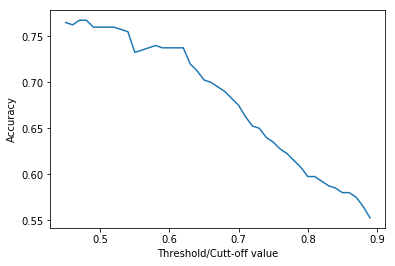

In [30]:
plt.plot(epsilonset,J_val)
plt.xlabel("Threshold/Cutt-off value")
plt.ylabel("Accuracy")

In [31]:
print(epsilonset[np.argmax(J_val)])

0.47000000000000003


In [33]:
pred=predictions>0.47
acc=accuracy_score(ytest,pred)
print(acc)

0.7675
